## LOGISTIC REGRESSION MODEL TO PREDICT WHETHER A PERSON WILL CLICK ON AN AD OR NO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
raw_data = pd.read_csv('advertising.csv')
raw_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
raw_data.describe(include = 'all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Configurable impactful firmware,Williamsport,NaN,France,2016-01-28 16:42:36,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


In [4]:
data = raw_data.copy()

In [5]:
data = data.drop(['Ad Topic Line','City', 'Country', 'Male','Timestamp'], axis = 1)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [6]:
data.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'], dtype=object)

In [7]:
y = data['Clicked on Ad']
x1 = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']]

## Plotting the Data

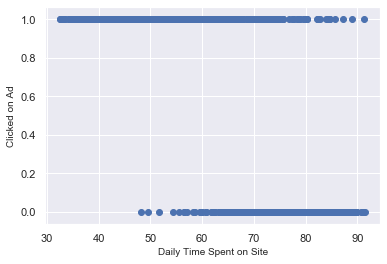

In [8]:
plt.scatter(data['Daily Time Spent on Site'],y)
plt.xlabel('Daily Time Spent on Site', fontsize = 10)
plt.ylabel('Clicked on Ad', fontsize = 10)
plt.show()

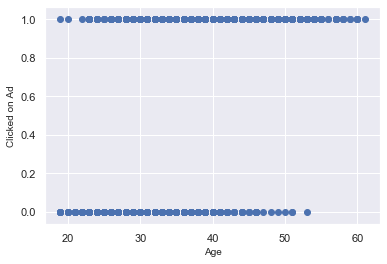

In [9]:
plt.scatter(data['Age'],y)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Clicked on Ad', fontsize = 10)
plt.show()

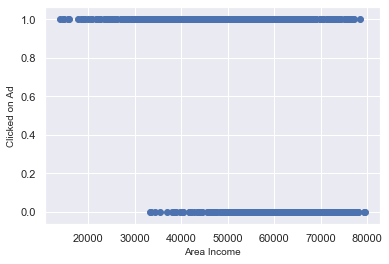

In [10]:
plt.scatter(data['Area Income'],y)
plt.xlabel('Area Income', fontsize = 10)
plt.ylabel('Clicked on Ad', fontsize = 10)
plt.show()

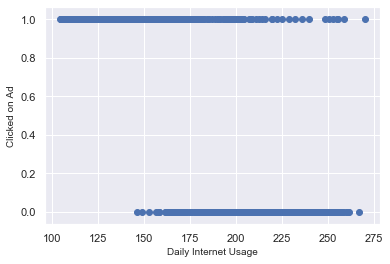

In [11]:
plt.scatter(data['Daily Internet Usage'],y)
plt.xlabel('Daily Internet Usage', fontsize = 10)
plt.ylabel('Clicked on Ad', fontsize = 10)
plt.show()

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1, y,test_size = 0.2, random_state = 365)

## Creating the Regression

In [51]:
x= sm.add_constant(x_test)
reg_log = sm.Logit(y_test,x)
log_results = reg_log.fit()
log_results.summary()

Optimization terminated successfully.
         Current function value: 0.116761
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Feb 2020   Pseudo R-squ.:                  0.8315
Time:                        18:37:44   Log-Likelihood:                -23.352
converged:                       True   LL-Null:                       -138.62
Covariance Type:            nonrobust   LLR p-value:                 1.013e-48
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       23.6262      5.095      4.637      0.000      13.640      33.613
Daily Time Spent on Site    -0.1725      0.043     -4.006      0.000      -0.257      -0.088
Age                          0.1235      0.046      2.692      0.007       0.034       0.213
Area Income                 -0.0001    3.6e-05     -3.509      0.000      -0.000   -5.57e-05
Daily Internet Usage        -0.0472      0.012     -3.992      0.000      -0.070      -0.024
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Confusion Matrix

In [52]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------

        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        df = pd.DataFrame(data = cm, columns =['Predicted','Actual'])
        print(f"Accuracy= {accuracy*100}%" )
        return cm, accuracy

In [54]:
confusion_matrix(x,y_test,log_results)

Accuracy= 97.0%


(array([[100.,   1.],
        [  5.,  94.]]),
 0.97)

In [55]:
cm_df = pd.DataFrame(log_results.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,100.0,1.0
Actual 1,5.0,94.0


### For 100 observations the model predicted 0(i.e. Not Clicked) when the value of 'Clicked on Ad' was 0(i.e. not clicked) and for 94 observations the model predicted the value 1(i.e.Clicked) when the value of 'Clicked on Ad' was 1(i.e. Clicked)

### In 5 cases model predicted 0(i.e. not Clicked) when it was actually 1(i.e. Clicked) and for 1 observations the model predicted 1(i.e.Clicked) when it actually was 0(i.e.Not Clicked)


# Resulting Accuracy
# 97.0%